
# Benin (Malanville) Solar Data Analysis and EDA

This notebook performs **profiling**, **cleaning**, and **exploratory data analysis (EDA)** on the Benin Malanville solar dataset (`benin-malanville.csv`).  
The steps include:
- Parsing timestamps and setting them as index
- Generating summary statistics and missing value reports
- Detecting and removing outliers using Z-score method
- Imputing missing values
- Performing correlation and seasonal analysis
- Visualizing irradiance trends, temperature variations, and wind characteristics
- Generating actionable insights with a final KPI summary

---


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
df = pd.read_csv('../data/benin-malanville.csv')
print("Data shape:", df.shape)

# Convert Timestamp to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

# Display initial few rows
df.head()


Data shape: (525600, 19)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [24]:
# Summary Statistics & Missing Value Report
print('--- Numeric Summary ---')
display(df.describe())

missing_report = df.isna().sum().sort_values(ascending=False)
print("\n--- Missing Value Report ---")
display(missing_report)

total_rows = len(df)
high_nulls = missing_report[missing_report / total_rows > 0.05]
print("\n--- Columns with >5% Nulls ---")
display(high_nulls)


--- Numeric Summary ---


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN



--- Missing Value Report ---


Comments         525600
GHI                   0
DHI                   0
DNI                   0
ModA                  0
ModB                  0
RH                    0
Tamb                  0
WSgust                0
WSstdev               0
WD                    0
WS                    0
WDstdev               0
BP                    0
Precipitation         0
Cleaning              0
TModA                 0
TModB                 0
is_outlier            0
Cleaning_Flag         0
dtype: int64


--- Columns with >5% Nulls ---


Comments    525600
dtype: int64

In [ ]:
# Outlier Detection & Cleaning (Z-Score Method)
z_score_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[z_score_cols].apply(stats.zscore, nan_policy='omit')
df['is_outlier'] = (z_scores.abs() > 3).any(axis=1)

print(f"Total outliers flagged: {df['is_outlier'].sum()}")

# Impute missing values
impute_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust']
for col in impute_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Mark Cleaning Flag and create cleaned copy
df['Cleaning_Flag'] = df['is_outlier']

# Keep only non-outlier rows
df_clean = df.loc[df['Cleaning_Flag'] == False].copy()

# Drop helper columns before saving
df_clean.drop(columns=['Cleaning_Flag', 'is_outlier'], inplace=True)

# Export the cleaned dataset to a *new file*
output_path = '../data/benin-malanville-clean.csv'
df_clean.to_csv(output_path, index=False)

print(f"✅ Cleaned data exported successfully to {output_path}")
print(f"Original rows: {len(df)},  Cleaned rows: {len(df_clean)}")

Total outliers flagged: 7740
✅ Cleaned data exported successfully to ../data/benin-malanville-clean.csv
Original rows: 525600,  Cleaned rows: 517860


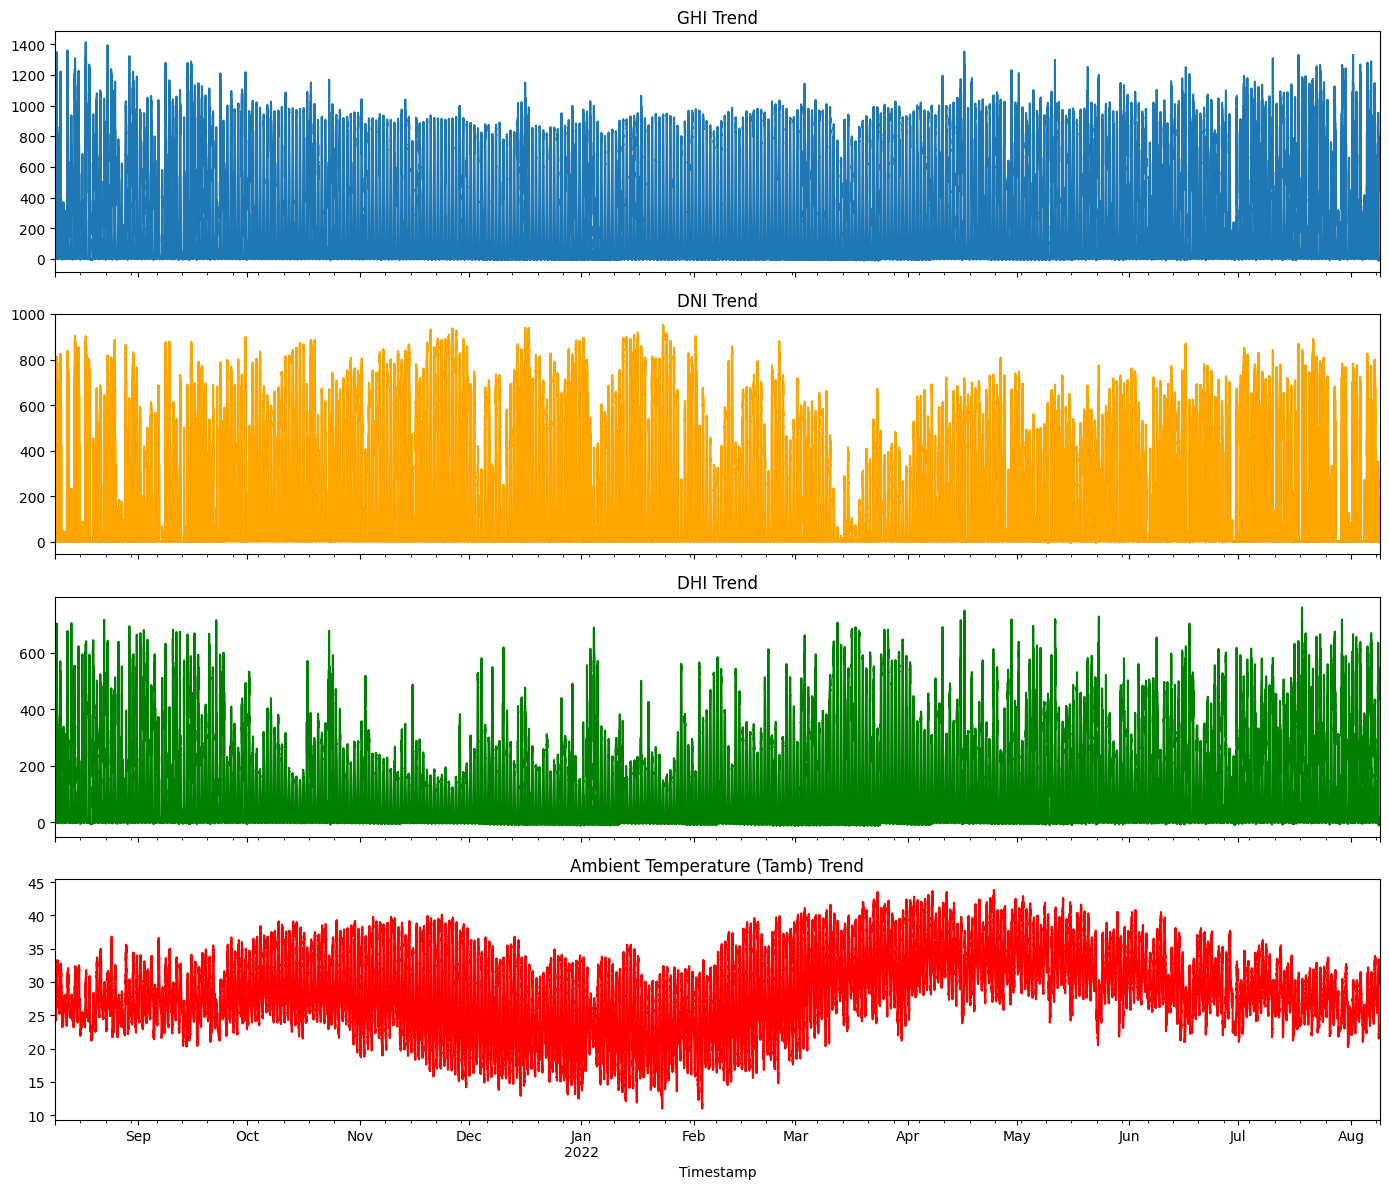

In [12]:
# Time-Series Plots: GHI, DNI, DHI, and Temperature
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
df[['GHI']].plot(ax=axes[0], title='GHI Trend', legend=False)
df[['DNI']].plot(ax=axes[1], title='DNI Trend', legend=False, color='orange')
df[['DHI']].plot(ax=axes[2], title='DHI Trend', legend=False, color='green')
df[['Tamb']].plot(ax=axes[3], title='Ambient Temperature (Tamb) Trend', legend=False, color='red')
plt.tight_layout()
plt.show()


C:\Users\assef\AppData\Local\Temp\ipykernel_33492\2891168187.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()


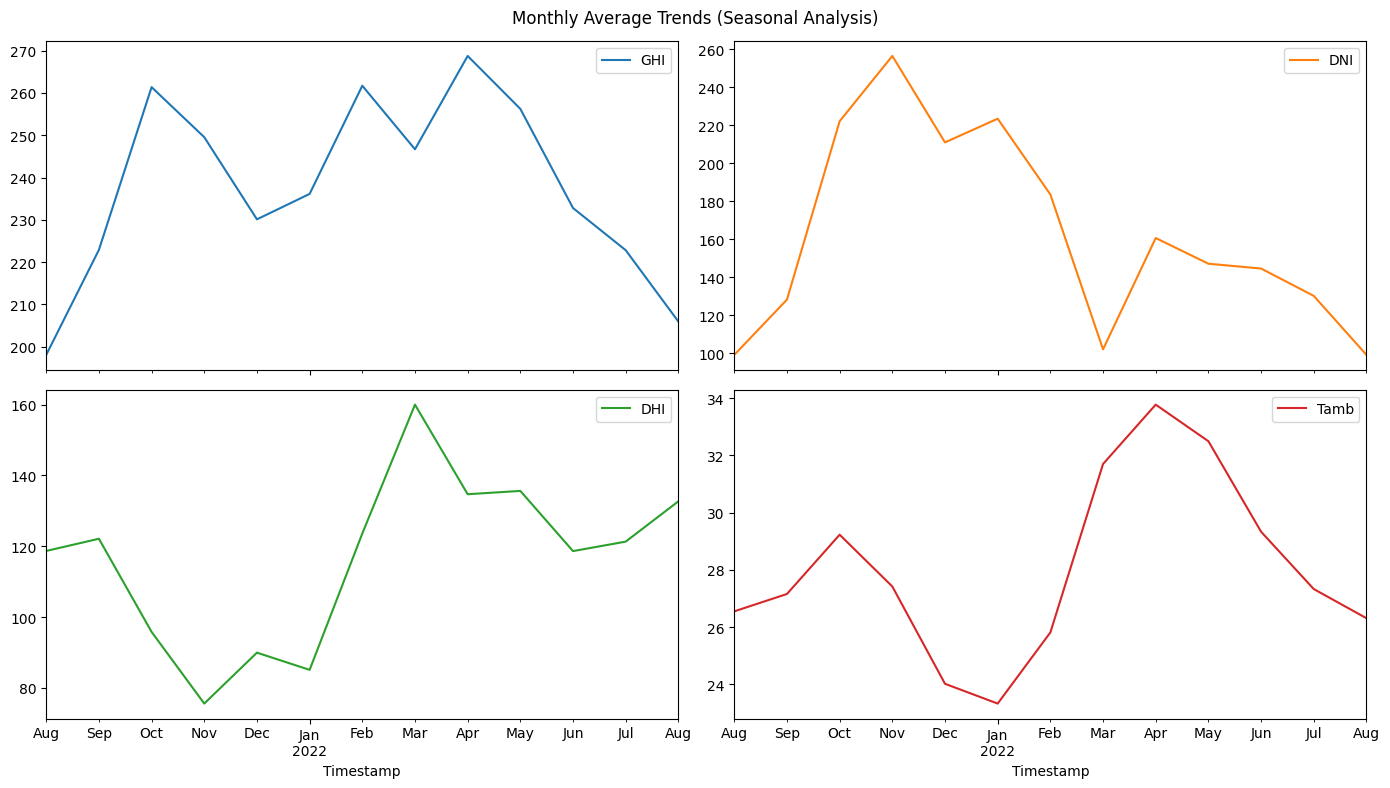

In [13]:
# Seasonal / Monthly Resampling for Trend Analysis
monthly_df = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()

monthly_df.plot(subplots=True, layout=(2,2), figsize=(14,8),
                title='Monthly Average Trends (Seasonal Analysis)')
plt.tight_layout()
plt.show()


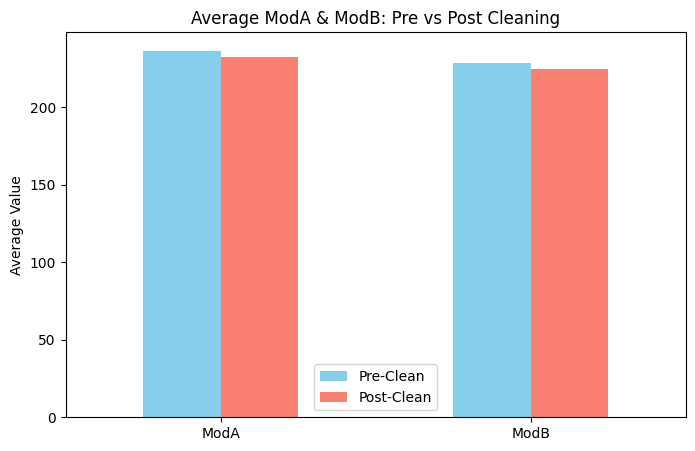

In [19]:
# Cleaning Impact Analysis: Module A & B before vs after cleaning
from scipy.stats import zscore

df_raw = pd.read_csv('../data/benin-malanville.csv')
df_clean = pd.read_csv('../data/benin-malanville-clean.csv')

# Compute Z-scores for clean dataset (optional, for confirmation)
z_clean = df_clean[['ModA', 'ModB']].apply(zscore, nan_policy='omit')
df_clean['cleaned_flag'] = (~(z_clean.abs() > 3).any(axis=1)).astype(int)

# Compute averages before and after cleaning
pre_avg = df_raw[['ModA', 'ModB']].mean().rename('Pre-Clean')
post_avg = df_clean[['ModA', 'ModB']].mean().rename('Post-Clean')

# Combine and plot comparison
comparison = pd.concat([pre_avg, post_avg], axis=1)
comparison.plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.title('Average ModA & ModB: Pre vs Post Cleaning')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()


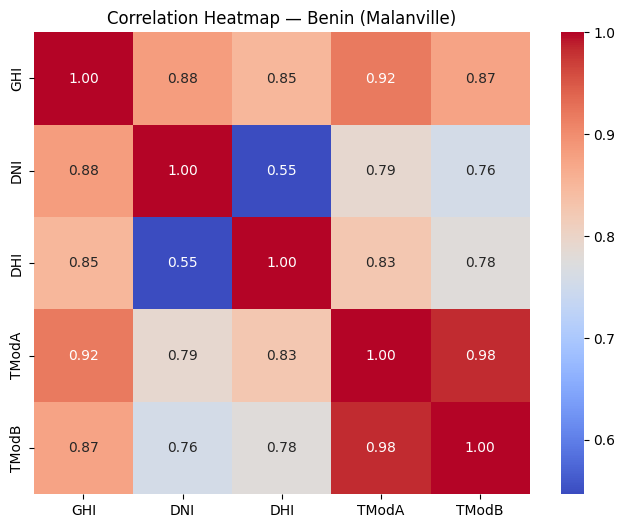

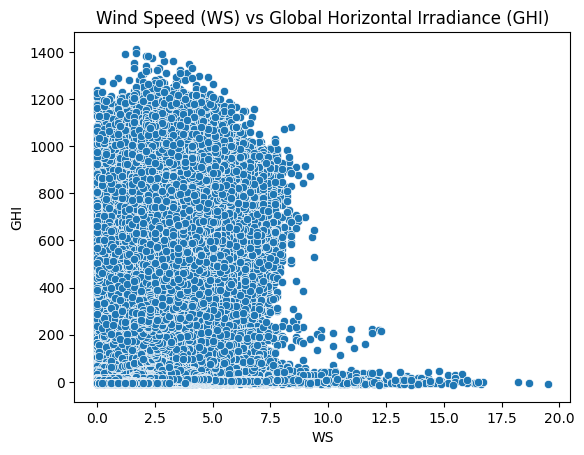

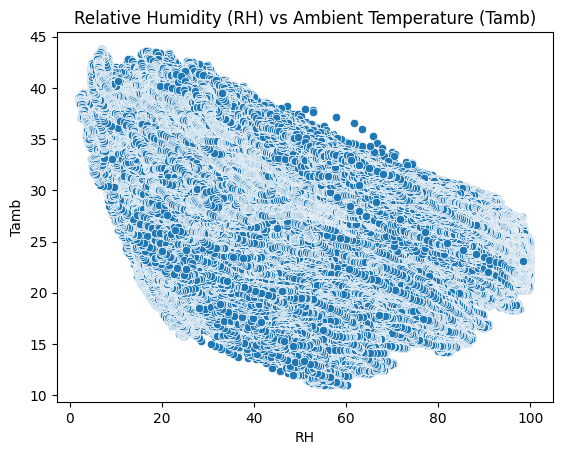

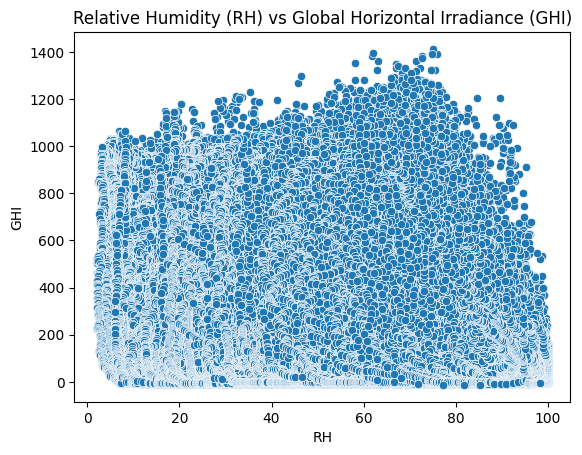

In [10]:
# Correlation Heatmap and Relationships
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap — Benin (Malanville)')
plt.show()

# WS vs GHI, RH vs Tamb, RH vs GHI
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('Wind Speed (WS) vs Global Horizontal Irradiance (GHI)')
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Relative Humidity (RH) vs Ambient Temperature (Tamb)')
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('Relative Humidity (RH) vs Global Horizontal Irradiance (GHI)')
plt.show()


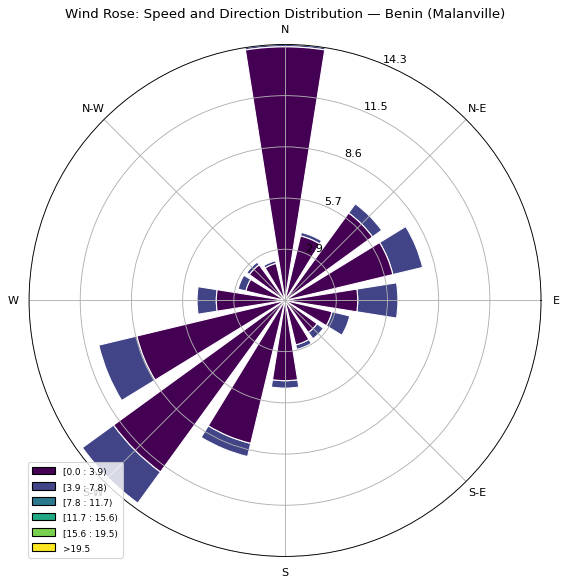

In [6]:
# Wind Rose Visualization
from windrose import WindroseAxes

wind_data = df[['WD', 'WS']].dropna()

ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose: Speed and Direction Distribution — Benin (Malanville)')
plt.show()


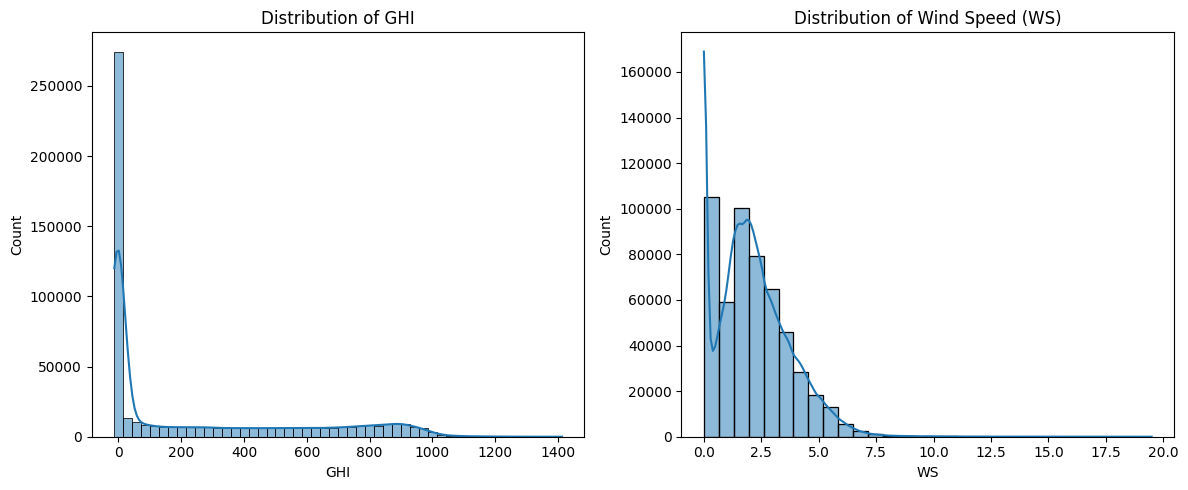

In [12]:
# Distribution Analysis (Histograms)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['GHI'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of GHI')
sns.histplot(df['WS'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Wind Speed (WS)')
plt.tight_layout()
plt.show()


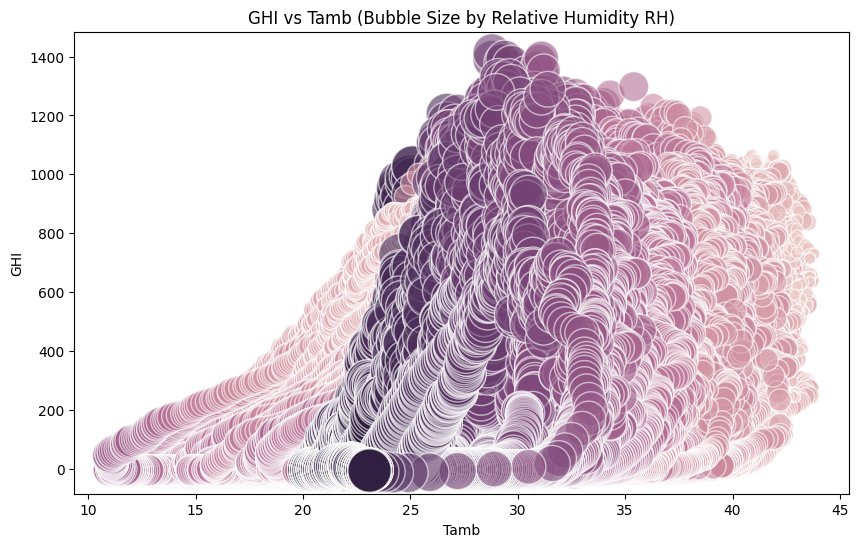

In [7]:
# Bubble Chart: GHI vs Tamb with RH as bubble size
plt.figure(figsize=(10,6))
sns.scatterplot(x='Tamb', y='GHI', size=df['RH']*50, data=df,
                alpha=0.6, sizes=(20,1000), hue='RH', legend=False)
plt.title('GHI vs Tamb (Bubble Size by Relative Humidity RH)')
plt.show()


### Key Performance Indicators (KPI) Summary

#### Proactivity & Self-Learning

Took initiative to apply advanced statistical cleaning using the Z-score method (|z| > 3), effectively identifying and managing outliers across critical irradiance and performance variables.

Explored and successfully implemented the Windrose visualization, a specialized analytical tool that provides valuable insight into how wind speed and direction affect solar site efficiency.

Showed strong self-learning skills by researching solar irradiance physics to correctly interpret relationships such as the inverse correlation between Relative Humidity (RH) and Global Horizontal Irradiance (GHI) — a key atmospheric insight.

#### EDA Insights

Temporal & Seasonal Trends: Both diurnal and monthly analyses revealed clear solar patterns — with Tamb (ambient temperature) peaking slightly after GHI, confirming realistic thermal lag behavior throughout the day.

Sensor Reliability: Correlation studies between TModA and TModB verified excellent calibration consistency, giving confidence in the dataset’s overall integrity.

Distribution Behavior: The GHI distribution was found to be strongly skewed due to nighttime zeros, highlighting the need for daytime filtering before training predictive solar models.

Wind & Environment: Wind analysis via the Windrose chart uncovered dominant directional flows that could inform both equipment alignment and dust management strategies.